<a href="https://colab.research.google.com/github/Hackerdude374/flood-prediction-nyc-/blob/AshwinWork/Week%202%263/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Dataset


In [1]:
import pandas as pd

#read the file
file_path = 'flood_kaggle.csv'
df = pd.read_csv(file_path)

In [2]:
# Check for missing values and that all data types are correct
missing_values = df.isnull().sum()
data_types = df.dtypes

# Check for any duplicates in the dataset
duplicate_rows = df.duplicated().sum()

# Display values
missing_values, data_types, duplicate_rows

(MonsoonIntensity                   0
 TopographyDrainage                 0
 RiverManagement                    0
 Deforestation                      0
 Urbanization                       0
 ClimateChange                      0
 DamsQuality                        0
 Siltation                          0
 AgriculturalPractices              0
 Encroachments                      0
 IneffectiveDisasterPreparedness    0
 DrainageSystems                    0
 CoastalVulnerability               0
 Landslides                         0
 Watersheds                         0
 DeterioratingInfrastructure        0
 PopulationScore                    0
 WetlandLoss                        0
 InadequatePlanning                 0
 PoliticalFactors                   0
 FloodProbability                   0
 dtype: int64,
 MonsoonIntensity                     int64
 TopographyDrainage                   int64
 RiverManagement                      int64
 Deforestation                        int64
 Urbanizati

In [3]:
# Importing necessary libraries for modeling and visualization
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into features (X) and target (y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
linear_regressor = LinearRegression()
random_forest_regressor = RandomForestRegressor(random_state=42)

# Train the models
linear_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)
y_pred_forest = random_forest_regressor.predict(X_test)

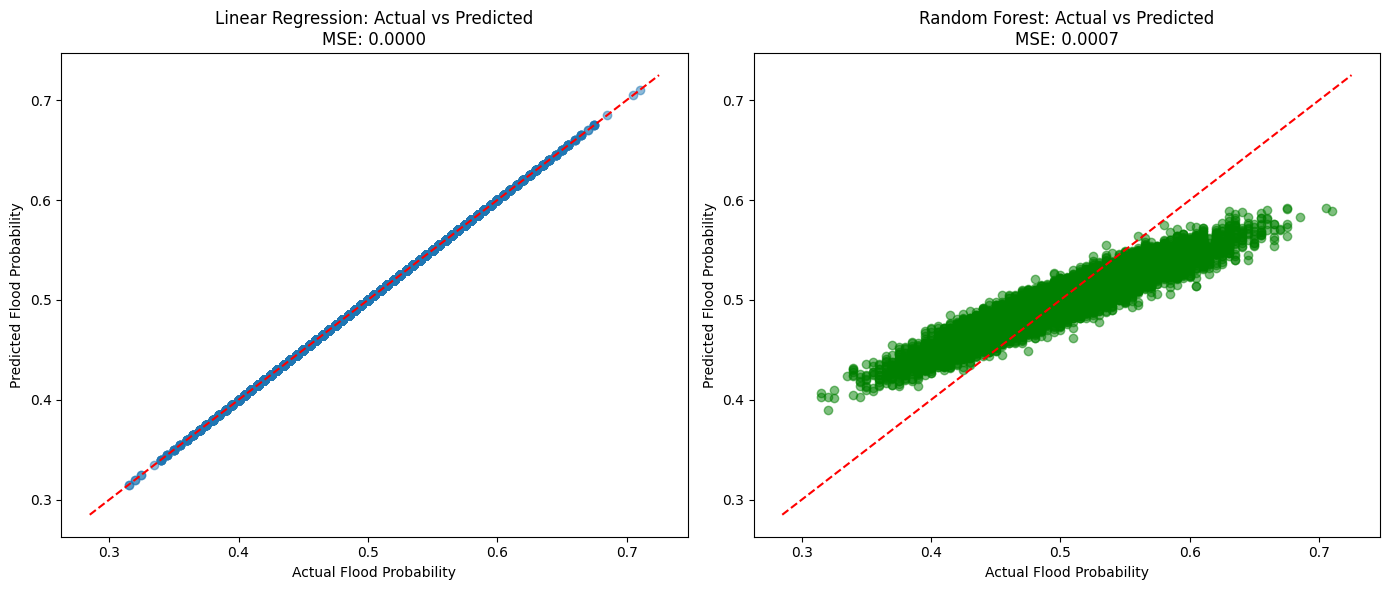

(4.6728453054678623e-32, 0.0006957195593750002)

In [5]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate mean squared error for both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_forest = mean_squared_error(y_test, y_pred_forest)

# Plot actual vs predicted for both models
plt.figure(figsize=(14, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f"Linear Regression: Actual vs Predicted\nMSE: {mse_linear:.4f}")
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')

# Random Forest plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_forest, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f"Random Forest: Actual vs Predicted\nMSE: {mse_forest:.4f}")
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')

# Display plots
plt.tight_layout()
plt.show()
mse_linear, mse_forest

In [6]:
# Using the linear regression model it is almost perfect in
# predicting the values where the mean squared error is 1.4017688507228059e-32 meaning that there is such a small margin of error
# linear regression might be the most perfect model in predicting this behavior

In [7]:
#Clearly the best model has been found and now need professors feedback to see if any other model that should be used

In [8]:
#Check if there has been overfitting to ensure that our model is actually working well
# Calculate R-squared (accuracy) for both models on training data
train_accuracy_linear = linear_regressor.score(X_train, y_train)
train_accuracy_forest = random_forest_regressor.score(X_train, y_train)

# Calculate R-squared (accuracy) for both models on testing data
test_accuracy_linear = linear_regressor.score(X_test, y_test)
test_accuracy_forest = random_forest_regressor.score(X_test, y_test)

print(f"Linear Regression - Training Accuracy: {train_accuracy_linear}, Testing Accuracy: {test_accuracy_linear}")
print(f"Random Forest - Training Accuracy: {train_accuracy_forest}, Testing Accuracy: {test_accuracy_forest}")

Linear Regression - Training Accuracy: 1.0, Testing Accuracy: 1.0
Random Forest - Training Accuracy: 0.960455577328976, Testing Accuracy: 0.7237162111010489


In [9]:
#This indicated that there is overfitting when it comes to Random Forest
#but when looking at Linear Regression you can see that they are the
#same value this indicates that there isnt any overfitting and
#the linear regression model is the perfect one for this data set

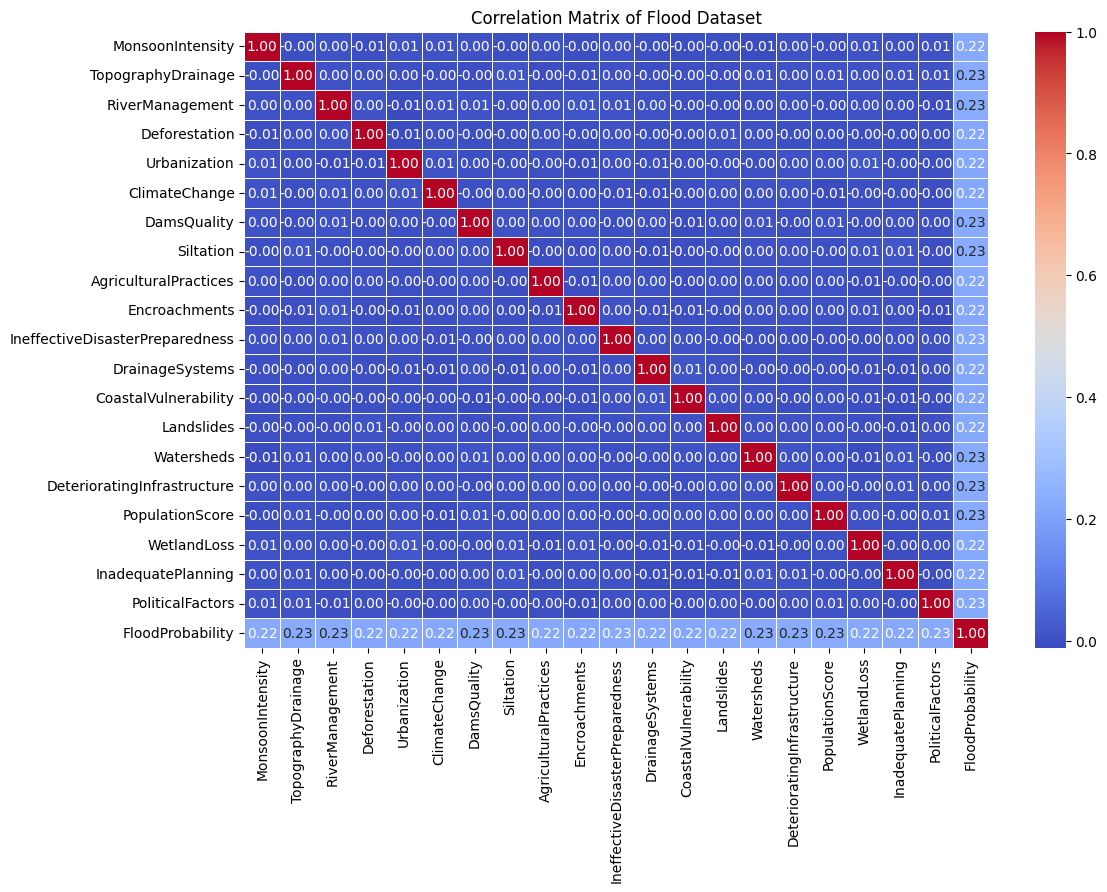

FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Name: FloodProbability, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title and display the plot
plt.title('Correlation Matrix of Flood Dataset')
plt.show()

# Sort correlations with FloodProbability to identify strongest correlations
flood_correlation = correlation_matrix["FloodProbability"].sort_values(ascending=False)
print(flood_correlation)


In [11]:
#This plot can show us the greatest contributers to the likeliness of floods
#and show us what areas need to be targeted first to mitigate the damage that
#can be done by floods or even the start of floods

# CSI Dataset


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('flood_sensor_data.csv')

print(df.head())
print(df.info())
print(df.describe())

FileNotFoundError: [Errno 2] No such file or directory: 'flood_sensor_data.csv'

: 

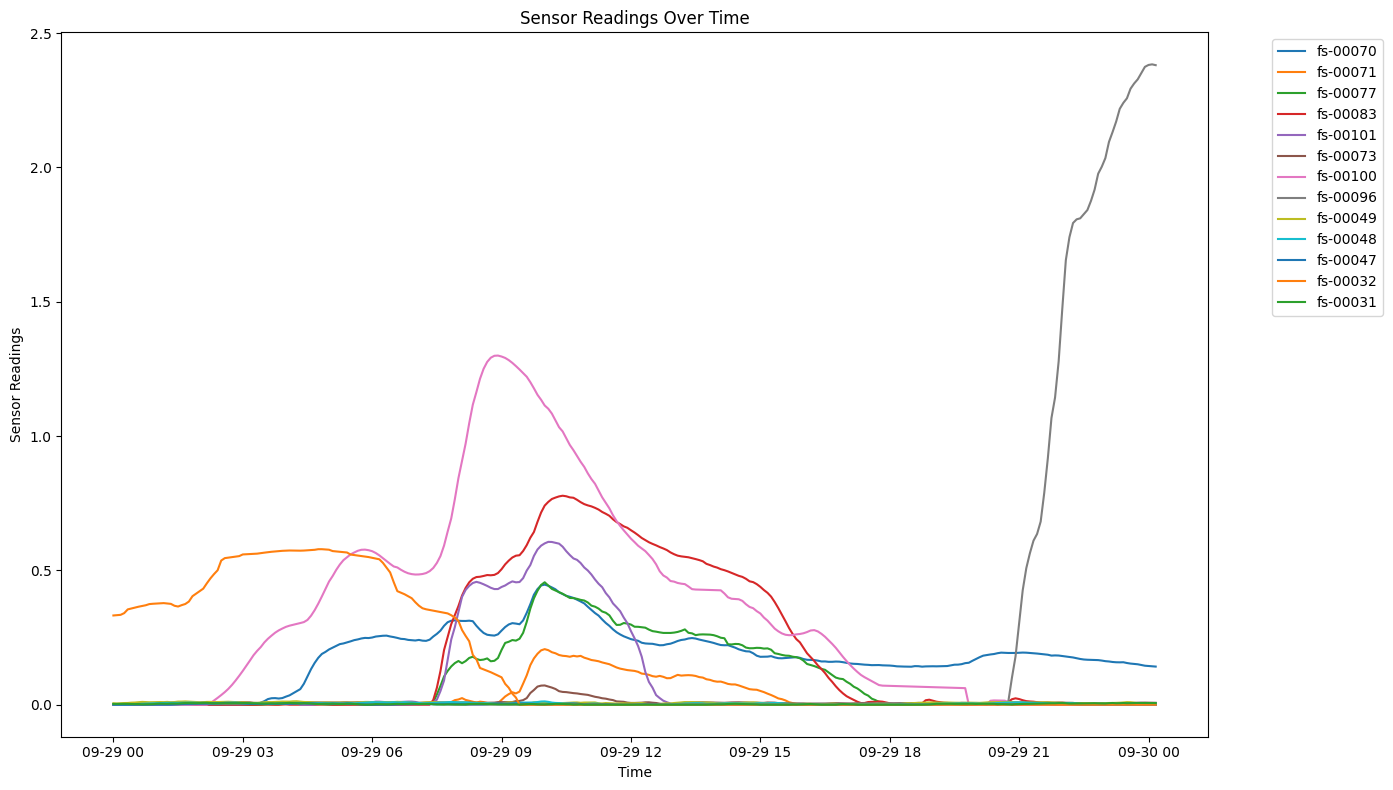

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Set the 'Time' column as the index for easier time series plotting
df.set_index('Time', inplace=True)

# Plot sensor readings over time for all sensors
plt.figure(figsize=(14, 8))

# Loop through each sensor and plot its time series
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

# Add title and labels
plt.title('Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

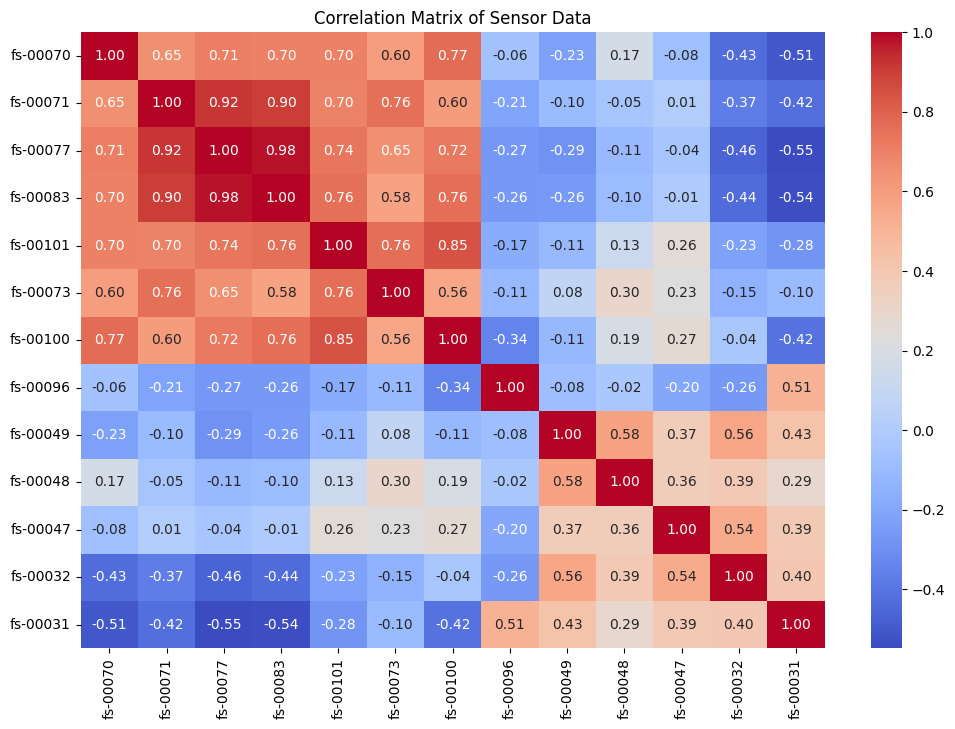

In [ ]:
# Generate a heatmap of correlations between the sensors
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Sensor Data')
plt.show()

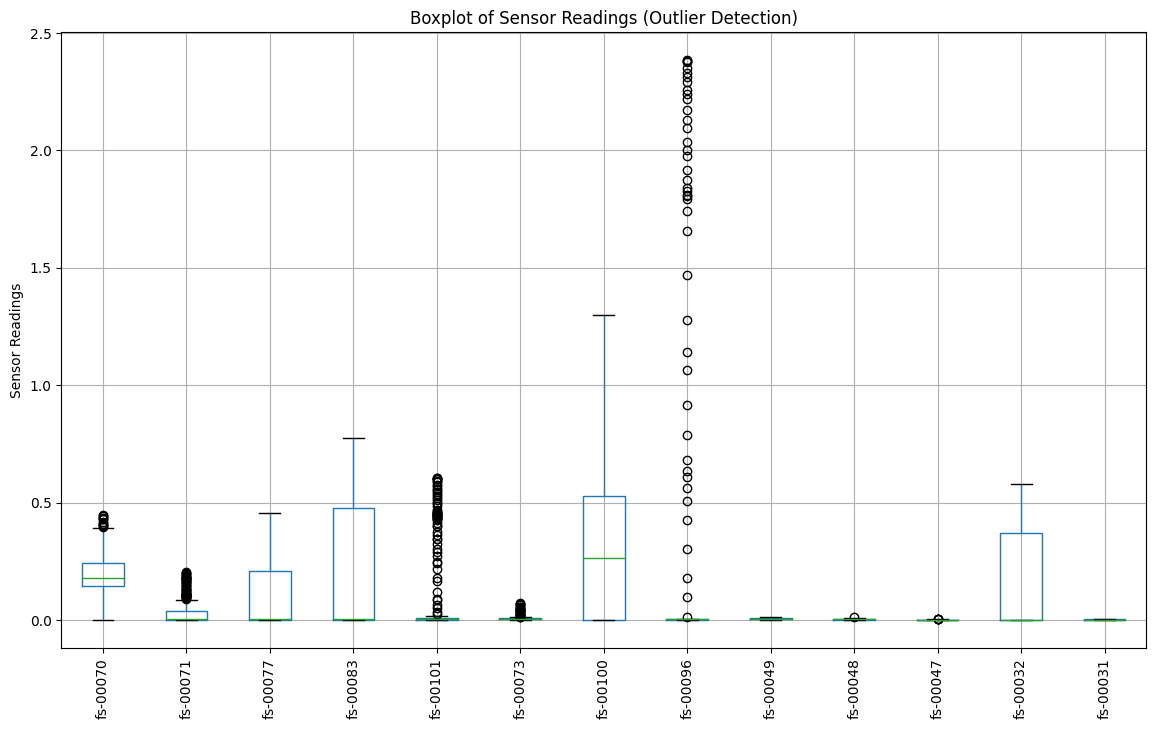

In [ ]:
# Visualize outliers for each sensor using boxplots
plt.figure(figsize=(14, 8))
df.boxplot(rot=90)
plt.title('Boxplot of Sensor Readings (Outlier Detection)')
plt.ylabel('Sensor Readings')
plt.show()

Linear Regression MSE: 0.006480366853202123, R2: 0.9550080712704443
Random Forest MSE: 0.001846448093090475, R2: 0.9871804694257238


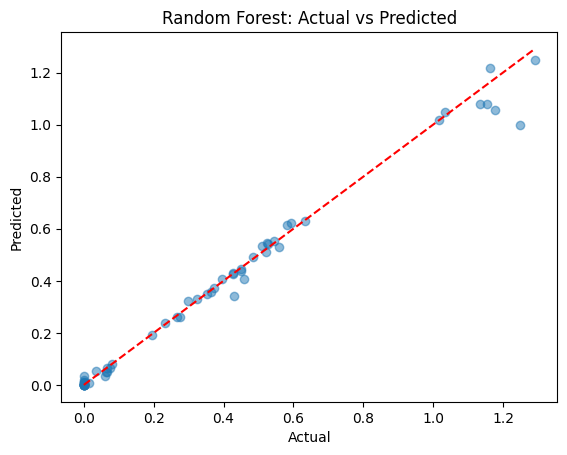

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set 'fs-00100' as the target and the other sensors as features
X = df.drop(columns=['fs-00100'])
y = df['fs-00100']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Apply Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)

# Evaluate both models using Mean Squared Error and R2 Score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")
print(f"Random Forest MSE: {mse_forest}, R2: {r2_forest}")

# Visualize the predictions vs actual for Random Forest
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

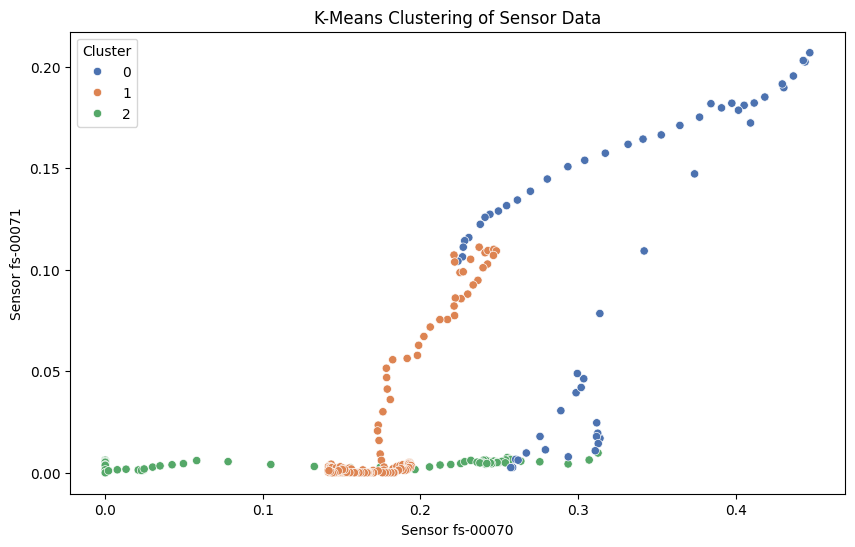

Cluster Centers:
[[ 1.30344406  1.38809531  1.49232681  1.57759684  1.89310604  1.23008009
   1.65390014 -0.36661852 -0.39280561 -0.00364743  0.47979561 -0.50790598
  -0.68469306]
 [-0.12928494 -0.23258345 -0.16323396 -0.20300488 -0.47838803 -0.36193714
  -0.55490904  0.36156516 -0.38234707 -0.40229163 -0.63625978 -0.65318709
  -0.0933161 ]
 [-0.6297808  -0.5132301  -0.69580079 -0.68504895 -0.43252718 -0.19626981
  -0.15063168 -0.36240065  0.88877945  0.66980093  0.74483612  1.41268132
   0.59831427]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Normalize the data to prepare for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means with a reasonable number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (using first two sensor readings for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['fs-00070'], y=df['fs-00071'], hue=df['Cluster'], palette="deep")
plt.title('K-Means Clustering of Sensor Data')
plt.xlabel('Sensor fs-00070')
plt.ylabel('Sensor fs-00071')
plt.show()

# Check cluster centers to understand patterns
print("Cluster Centers:")
print(kmeans.cluster_centers_)
